In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [40]:
from simulator import * 

In [3]:
sim = Simulator()

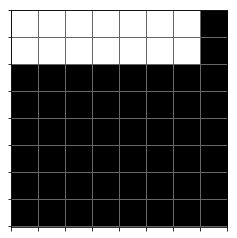

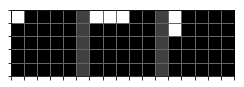

In [4]:
def plot(state):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.imshow(unpack(state.board), cmap='gray')
    ax.set_xticks(np.arange(-.5, 8, 1));
    ax.set_yticks(np.arange(-.55, 8, 1));
    ax.set_xticklabels([]);
    ax.set_yticklabels([]);
    ax.grid(which='major', color='#666666', linestyle='-', linewidth=1)
    plt.show()
    
    pieces = np.concatenate([unpack(p)[:5, :6] for p in state.pieces], axis=1)
    pieces *= 4
    pieces[:, 5::6] = 1
    fig, ax = plt.subplots(figsize=(4,2))
    ax.imshow(pieces[:, :-1], cmap='gray')
    ax.set_xticklabels([]);
    ax.set_yticklabels([]);
    ax.set_xticks(np.arange(-.5, 17, 1));
    ax.set_yticks(np.arange(-.55, 5, 1));
    ax.grid(which='major', color='#666666', linestyle='-', linewidth=1)
    plt.show()

test_state = State(127+(127<<8))
test_state.pieces[0] = 1
test_state.pieces[1] = 7
test_state.pieces[2] = 257
plot(test_state)

Step 1


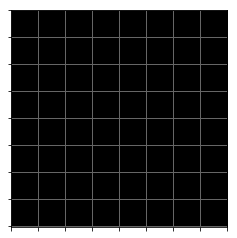

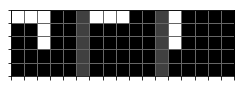

Available moves: 46589
Moves [(0, 1, 2), (1, 3, 0), (2, 0, 3)]
Step 2


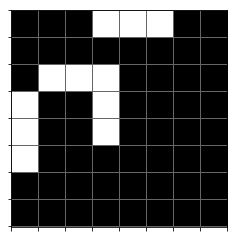

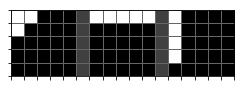

Available moves: 4584
Moves [(0, 6, 1), (1, 1, 7), (2, 6, 4)]
Step 3


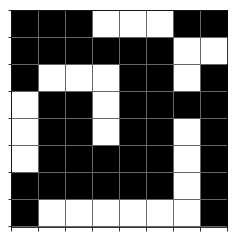

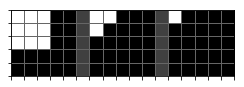

Available moves: 6
Moves [(1, 0, 6), (2, 7, 7), (0, 2, 5)]
Step 4


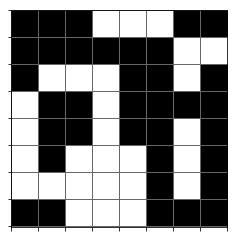

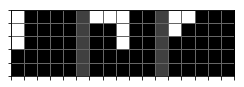

Available moves: 299
Moves [(0, 4, 2), (1, 3, 1), (2, 0, 1)]
Step 5


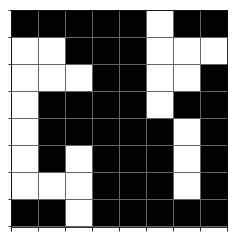

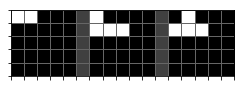

Available moves: 1104
Moves [(0, 0, 7), (1, 1, 3), (2, 2, 2)]
Step 6


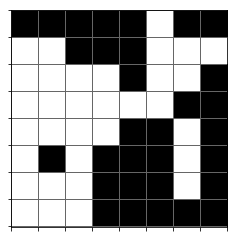

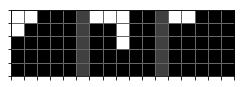

Available moves: 173
Moves [(0, 2, 0), (1, 2, 5), (2, 3, 1)]
Step 7


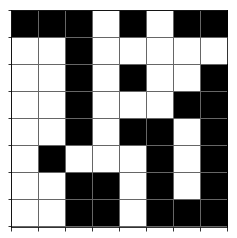

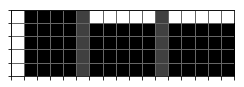

Available moves: 0


In [6]:
state = State()
state.draw()

step = 0
while True:
    step += 1
    print("Step", step)
    plot(state)
    boards = sim.brute(state)
    print("Available moves:", len(boards))
    if boards.shape[0] == 0:
        break

    best_board = boards[np.random.randint(boards.shape[0])]
    best_move = sim.get_move(best_board)
    print("Moves", best_move)
    state = State(best_board)
    state.draw()

In [41]:
state = State()


In [72]:
np.array([
    1,
    3,
    7,
    15,
    31,
    1 | (1<<8),
    3 | (3<<8),
    2 | (7<<8),
    1 | (7<<8),
    3 | (1<<8),
    1 | (1<<8) | (1<<16),
    7 | (4<<8) | (4<<16),
    7 | (7<<8) | (7<<16),
    1 | (1<<8) | (1<<16) | (1<<24),
    1 | (1<<8) | (1<<16) | (1<<24) | (1<<32),
    ], dtype=np.uint64)

array([         1,          3,          7,         15,         31,
              257,        771,       1794,       1793,        259,
            65793,     263175,     460551,   16843009, 4311810305],
      dtype=uint64)

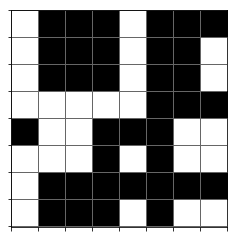

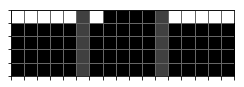

In [75]:
state.pieces[0] = 31
state.pieces[1] = 1
state.pieces[2] = 31
plot(state)

In [63]:
mask = ((1 << 8) - 1) // 3
mask = mask | (mask << 9)
mask = mask | (mask << 16)
mask = mask | (mask << 32)
a = np.array([1, 2, 5, 127<<8, mask], dtype=np.uint64)
a

array([                   1,                    2,                    5,
                      32512, 12273903644374837845], dtype=uint64)

In [70]:
np.random.choice(a, p=a/a.sum())

12273903644374837845

In [64]:
d = unpack_array(a)
print(d.shape)
d

(5, 8, 8)


array([[[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        

In [93]:
from model import model
import tensorflow as tf

tf.reset_default_graph()

tf_input_data = tf.placeholder(tf.uint8, [None, 8, 8])
base_learning_rate = 1e-3


MEMORY_CAPACITY = 200000
batch_size = 512

# MEMORY stores tuples:
# (observation, label, reward)
MEMORY = deque([], maxlen=MEMORY_CAPACITY)
def gen():
    for m in list(MEMORY):
        yield m
        
with tf.name_scope('dataset'):
    # the dataset reads from MEMORY
    ds = tf.data.Dataset.from_generator(gen, output_types=(tf.uint8, tf.float32))
    ds = ds.shuffle(MEMORY_CAPACITY).repeat().batch(batch_size)
    iterator = ds.make_one_shot_iterator()

with tf.name_scope("train"):
    next_batch = iterator.get_next()
    input_data, labels = next_batch
    input_data.set_shape((batch_size, 8, 8))
    vals = model(input_data, training=True)
    losses = tf.losses.softmax_cross_entropy(
        onehot_labels=tf.stack([1 - labels, labels], axis=1),
        logits=vals['logits'],
    )
    tf_loss = tf.reduce_mean(losses)
    tf_train = tf.train.AdamOptimizer(base_learning_rate).minimize(tf_loss)

with tf.name_scope("predict"):
    vals = model(tf_input_data, training=False)
    tf_probabilities = vals['probabilities']
    

Tensor("train/IteratorGetNext:0", shape=(512, 8, 8), dtype=uint8)
Tensor("train/model/PadV2:0", shape=(512, 12, 12), dtype=uint8)
Tensor("train/model/Reshape:0", shape=(512, 12, 12, 1), dtype=float32)
Tensor("train/model/conv2d/Relu:0", shape=(512, 8, 8, 64), dtype=float32)
Tensor("train/model/conv2d_1/Relu:0", shape=(512, 4, 4, 256), dtype=float32)
Tensor("train/model/conv2d_2/Relu:0", shape=(512, 1, 1, 1024), dtype=float32)
Tensor("train/model/Reshape_1:0", shape=(512, 1024), dtype=float32)
Tensor("train/model/dense/Relu:0", shape=(512, 1024), dtype=float32)
Tensor("train/model/dense_1/BiasAdd:0", shape=(512, 2), dtype=float32)
Tensor("Placeholder:0", shape=(?, 8, 8), dtype=uint8)
Tensor("predict/model/PadV2:0", shape=(?, 12, 12), dtype=uint8)
Tensor("predict/model/Reshape:0", shape=(?, 12, 12, 1), dtype=float32)
Tensor("predict/model/conv2d/Relu:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("predict/model/conv2d_1/Relu:0", shape=(?, 4, 4, 256), dtype=float32)
Tensor("predict/model/

In [ ]:
max_games = 10000
max_steps_per_game = 1000
max_batch_size = 1024 * 16
reward_discount = 0.8

sim.stop()
sim = Simulator()
can_train = False

with tf.Session() as sess:
    sess.run([tf.global_variables_initializer(), tf.local_variables_initializer()])

    added = 0
    for game_id in range(max_games):
        state = State()
        state.draw()
        state_history = [0]

        step = 0
        for step in range(max_steps_per_game):
            # print("Step", step)
            # plot(state)
            boards = sim.brute(state)
            # print("Available moves:", len(boards))
            if boards.shape[0] == 0:
                break

            unpacked_boards = unpack_array(boards)
            # predicting boards probabilities
            all_probs = []
            for b in range(0, unpacked_boards.shape[0], max_batch_size):
                probs = sess.run(tf_probabilities, feed_dict={
                    tf_input_data: unpacked_boards[b:b+max_batch_size],
                })
                all_probs.append(probs)
            
            joined_probs = np.concatenate(all_probs)
            # joined_probs_sum = joined_probs.sum()
            # joined_probs /= joined_probs_sum if joined_probs_sum > 0 else 1.0
            best_board = boards[joined_probs.argmax()]
            state_history.append(best_board)
            # best_move = sim.get_move(best_board)
            # print("Moves", best_move)
            state = State(best_board)
            state.draw()
        
        state_history = np.array(state_history, dtype=np.uint64)
        labels = (1.0 - np.power(reward_discount, np.arange(state_history.shape[0], dtype=np.float32)))[::-1]
        unpacked_history = unpack_array(state_history)
        MEMORY.extend(zip(unpacked_history, labels))
        added += unpacked_history.shape[0]
        
        print("Game #%3d: total %3d steps. Memory size %d" % (game_id, step + 1, len(MEMORY)))

        if (added >= batch_size):
            loss, _ = sess.run([tf_loss, tf_train])
            added -= batch_size
            print("Loss %.6f" % (loss,))


Game #  0: total   5 steps. Memory size 5
Game #  1: total  14 steps. Memory size 19
Game #  2: total  18 steps. Memory size 37
Game #  3: total   9 steps. Memory size 46
Game #  4: total   8 steps. Memory size 54
Game #  5: total  13 steps. Memory size 67
Game #  6: total   5 steps. Memory size 72
Game #  7: total   7 steps. Memory size 79
Game #  8: total   9 steps. Memory size 88
Game #  9: total  11 steps. Memory size 99
Game # 10: total   7 steps. Memory size 106
Game # 11: total   8 steps. Memory size 114
Game # 12: total   5 steps. Memory size 119
Game # 13: total   3 steps. Memory size 122
Game # 14: total   8 steps. Memory size 130
Game # 15: total   6 steps. Memory size 136
Game # 16: total  15 steps. Memory size 151
Game # 17: total   9 steps. Memory size 160
Game # 18: total   7 steps. Memory size 167
Game # 19: total   6 steps. Memory size 173
Game # 20: total  14 steps. Memory size 187
Game # 21: total  10 steps. Memory size 197
Game # 22: total  13 steps. Memory size 210

Game #181: total  35 steps. Memory size 5207
Game #182: total 120 steps. Memory size 5327
Game #183: total  59 steps. Memory size 5386
Game #184: total 134 steps. Memory size 5520
Game #185: total  58 steps. Memory size 5578
Game #186: total  20 steps. Memory size 5598
Game #187: total 101 steps. Memory size 5699
Loss 0.429230
Game #188: total  90 steps. Memory size 5789
Game #189: total  25 steps. Memory size 5814
Game #190: total  43 steps. Memory size 5857
Game #191: total  17 steps. Memory size 5874
Game #192: total  10 steps. Memory size 5884
Game #193: total  20 steps. Memory size 5904
Game #194: total  11 steps. Memory size 5915
Game #195: total  33 steps. Memory size 5948
Game #196: total  52 steps. Memory size 6000
Game #197: total  34 steps. Memory size 6034
Game #198: total  28 steps. Memory size 6062
Game #199: total  39 steps. Memory size 6101
Game #200: total 114 steps. Memory size 6215
Loss 0.434047
Game #201: total  50 steps. Memory size 6265
Game #202: total 165 steps.

In [59]:
mask = ((1 << 8) - 1) // 3
mask = mask | (mask << 9)
mask = mask | (mask << 16)
mask = mask | (mask << 32)

BRUTE 12273903644374837845 1 3 257



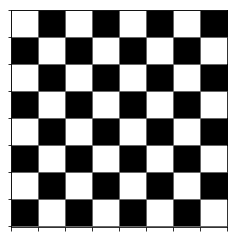

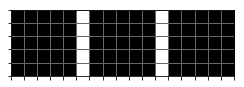

In [60]:
print("BRUTE %d %d %d %d\n" % (mask, 1, 3, 257))
plot(State(mask))